In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [34]:
folder = '../checkpoints/seed_668823_out_TNH_staTyp_ConvMLP_staSz_70_3_128_7_730_10-5-1_7-5-3_1-1-1_3-2-1_dynTyp_LSTM_dynSz_73_128_3_routSz_6_32_2_t_1221-2048'
beta = np.load(os.path.join(folder, 'beta.npy'))
t_range = pd.date_range('1990-1-1', '2019-12-31')
beta = pd.DataFrame(beta.T, index=t_range)

In [ ]:
from matplotlib.colors import ListedColormap
from typing import Union, List
import geopandas as gpd
from matplotlib import colors as cm

def plotBetaMap(beta, cmap, basinFile, tRange: Union[None, List[str]] = None, figSize=(10, 2.5), savePath=None, fmt='pdf'):
    import warnings
    warnings.filterwarnings('ignore')  # ignore the warning of plt.tight_layout()
    plt.rcParams['font.family'] = 'Arial'
    sns.set(style='ticks')
    if tRange is None:
        tRange = ['2000-1-1', '2019-12-31']
    tRange = pd.date_range(tRange[0], tRange[1])
    basins = gpd.read_file(basinFile)

    # calculate monthly mean soil water
    df_temp = beta[beta.index.isin(tRange)]
    df_temp_mean = df_temp.groupby(df_temp.index.month).mean().T

    # get a month dict for annotation
    monDict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
               10: 'Oct', 11: 'Nov', 12: 'Dec'}

    # set color bar annotation
    labelDict = {'Sss': 'Frozen water (mm)', 'Ssl': 'Unfrozen water (mm)'}
    vMin, vMax = 9999, -9999
    dfPlot = pd.concat([basins, df_temp_mean], axis=1)
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=figSize, dpi=300)
    cbarAx = fig.add_axes([0.907, 0.168, 0.007, 0.658])  # left, bottom, width, height
    # Normalize the colormap to the data range
    vMin = dfPlot[range(1, 13)].min().min() if dfPlot[range(1, 13)].min().min() < vMin else vMin
    vMax = dfPlot[range(1, 13)].max().max() if dfPlot[range(1, 13)].max().max() > vMax else vMax
    for month in range(1, 13):
        axRow, axCol = int((month - 1) / 6), (month - 1) % 6
        ax = axes[axRow, axCol]
        dfPlot.plot(column=month, ax=ax, cmap=cmap, edgecolor='None', linewidth=0.1)
        ax.annotate(monDict[month], xy=(0.03, 0.05), xycoords='axes fraction', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

        # Set axis spines properties
        lw = 0.8
        ax.spines['top'].set_linewidth(lw)  # Top spine thickness
        ax.spines['bottom'].set_linewidth(lw)  # Bottom spine thickness
        ax.spines['left'].set_linewidth(lw)  # Left spine thickness
        ax.spines['right'].set_linewidth(lw)  # Right spine thickness

        # add a color bar for all axes
        norm = cm.Normalize(vmin=vMin, vmax=vMax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        cbar = plt.colorbar(sm, cax=cbarAx, orientation='vertical')

        cbar.ax.set_ylabel(r'$\beta$', fontsize=10)
        cbar.ax.tick_params(direction='out', length=2, labelsize=10)
        cbar.outline.set_linewidth(lw)

    # plt.tight_layout(rect=[0, 0, 0.95, 1])  # left, bottom, right, top
    plt.subplots_adjust(wspace=0.1, hspace=-0.15)
    plt.show()


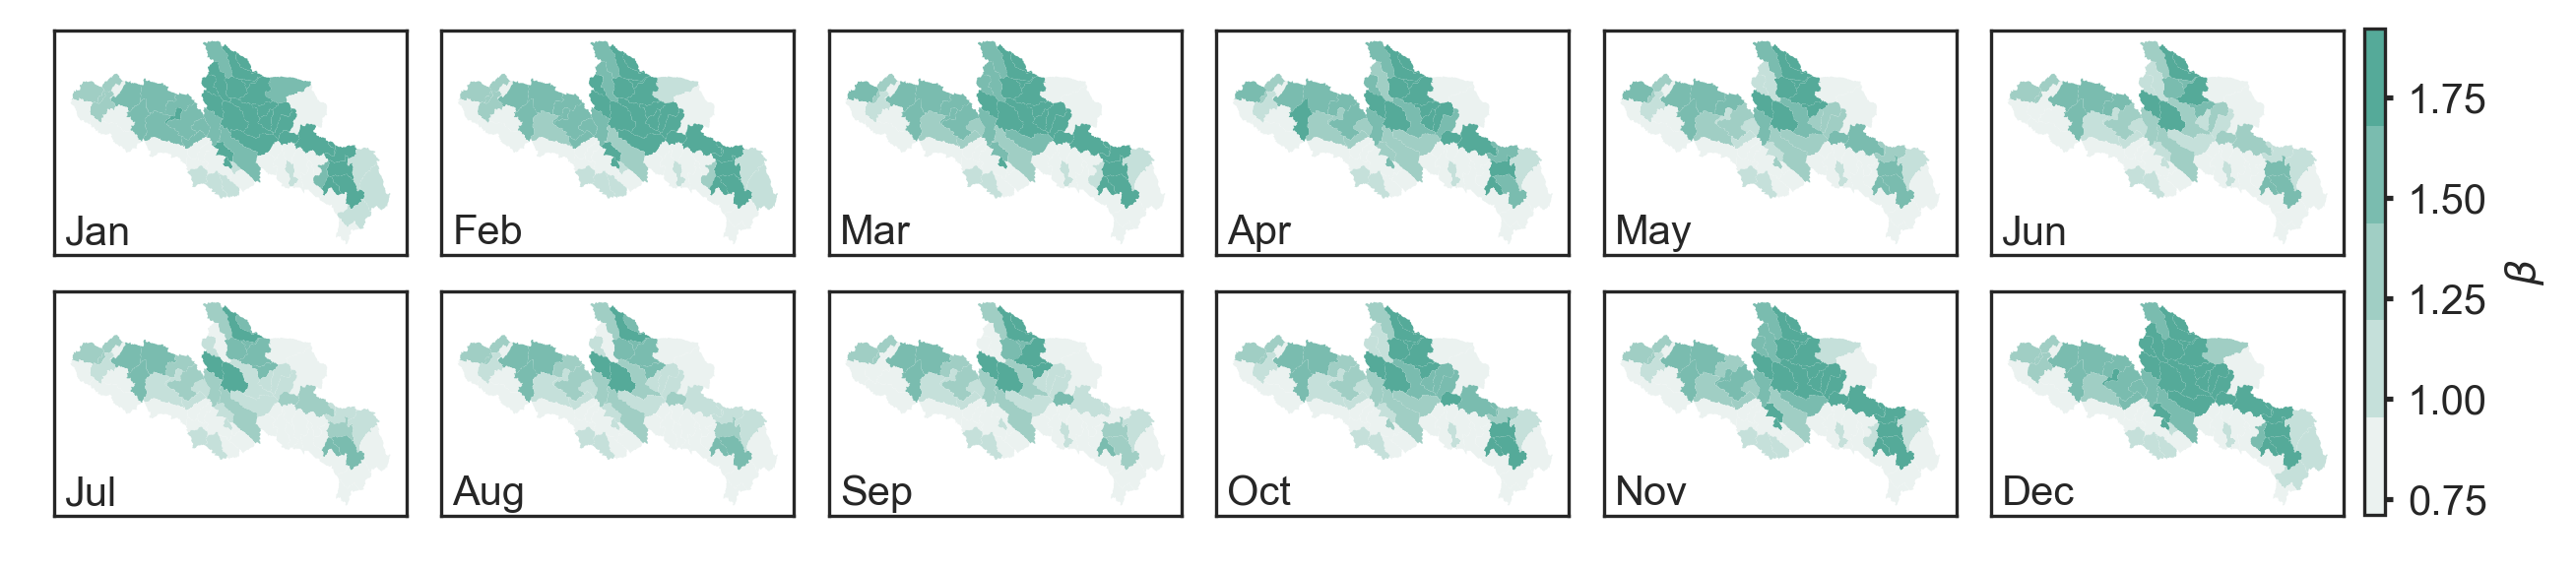

In [46]:
colors = sns.color_palette('light:#5A9', n_colors=5)
cmap = ListedColormap(colors)
plotBetaMap(beta, cmap=cmap, basinFile='../data/sub-basins/watershed.shp', figSize=(10, 2.5), savePath=None)

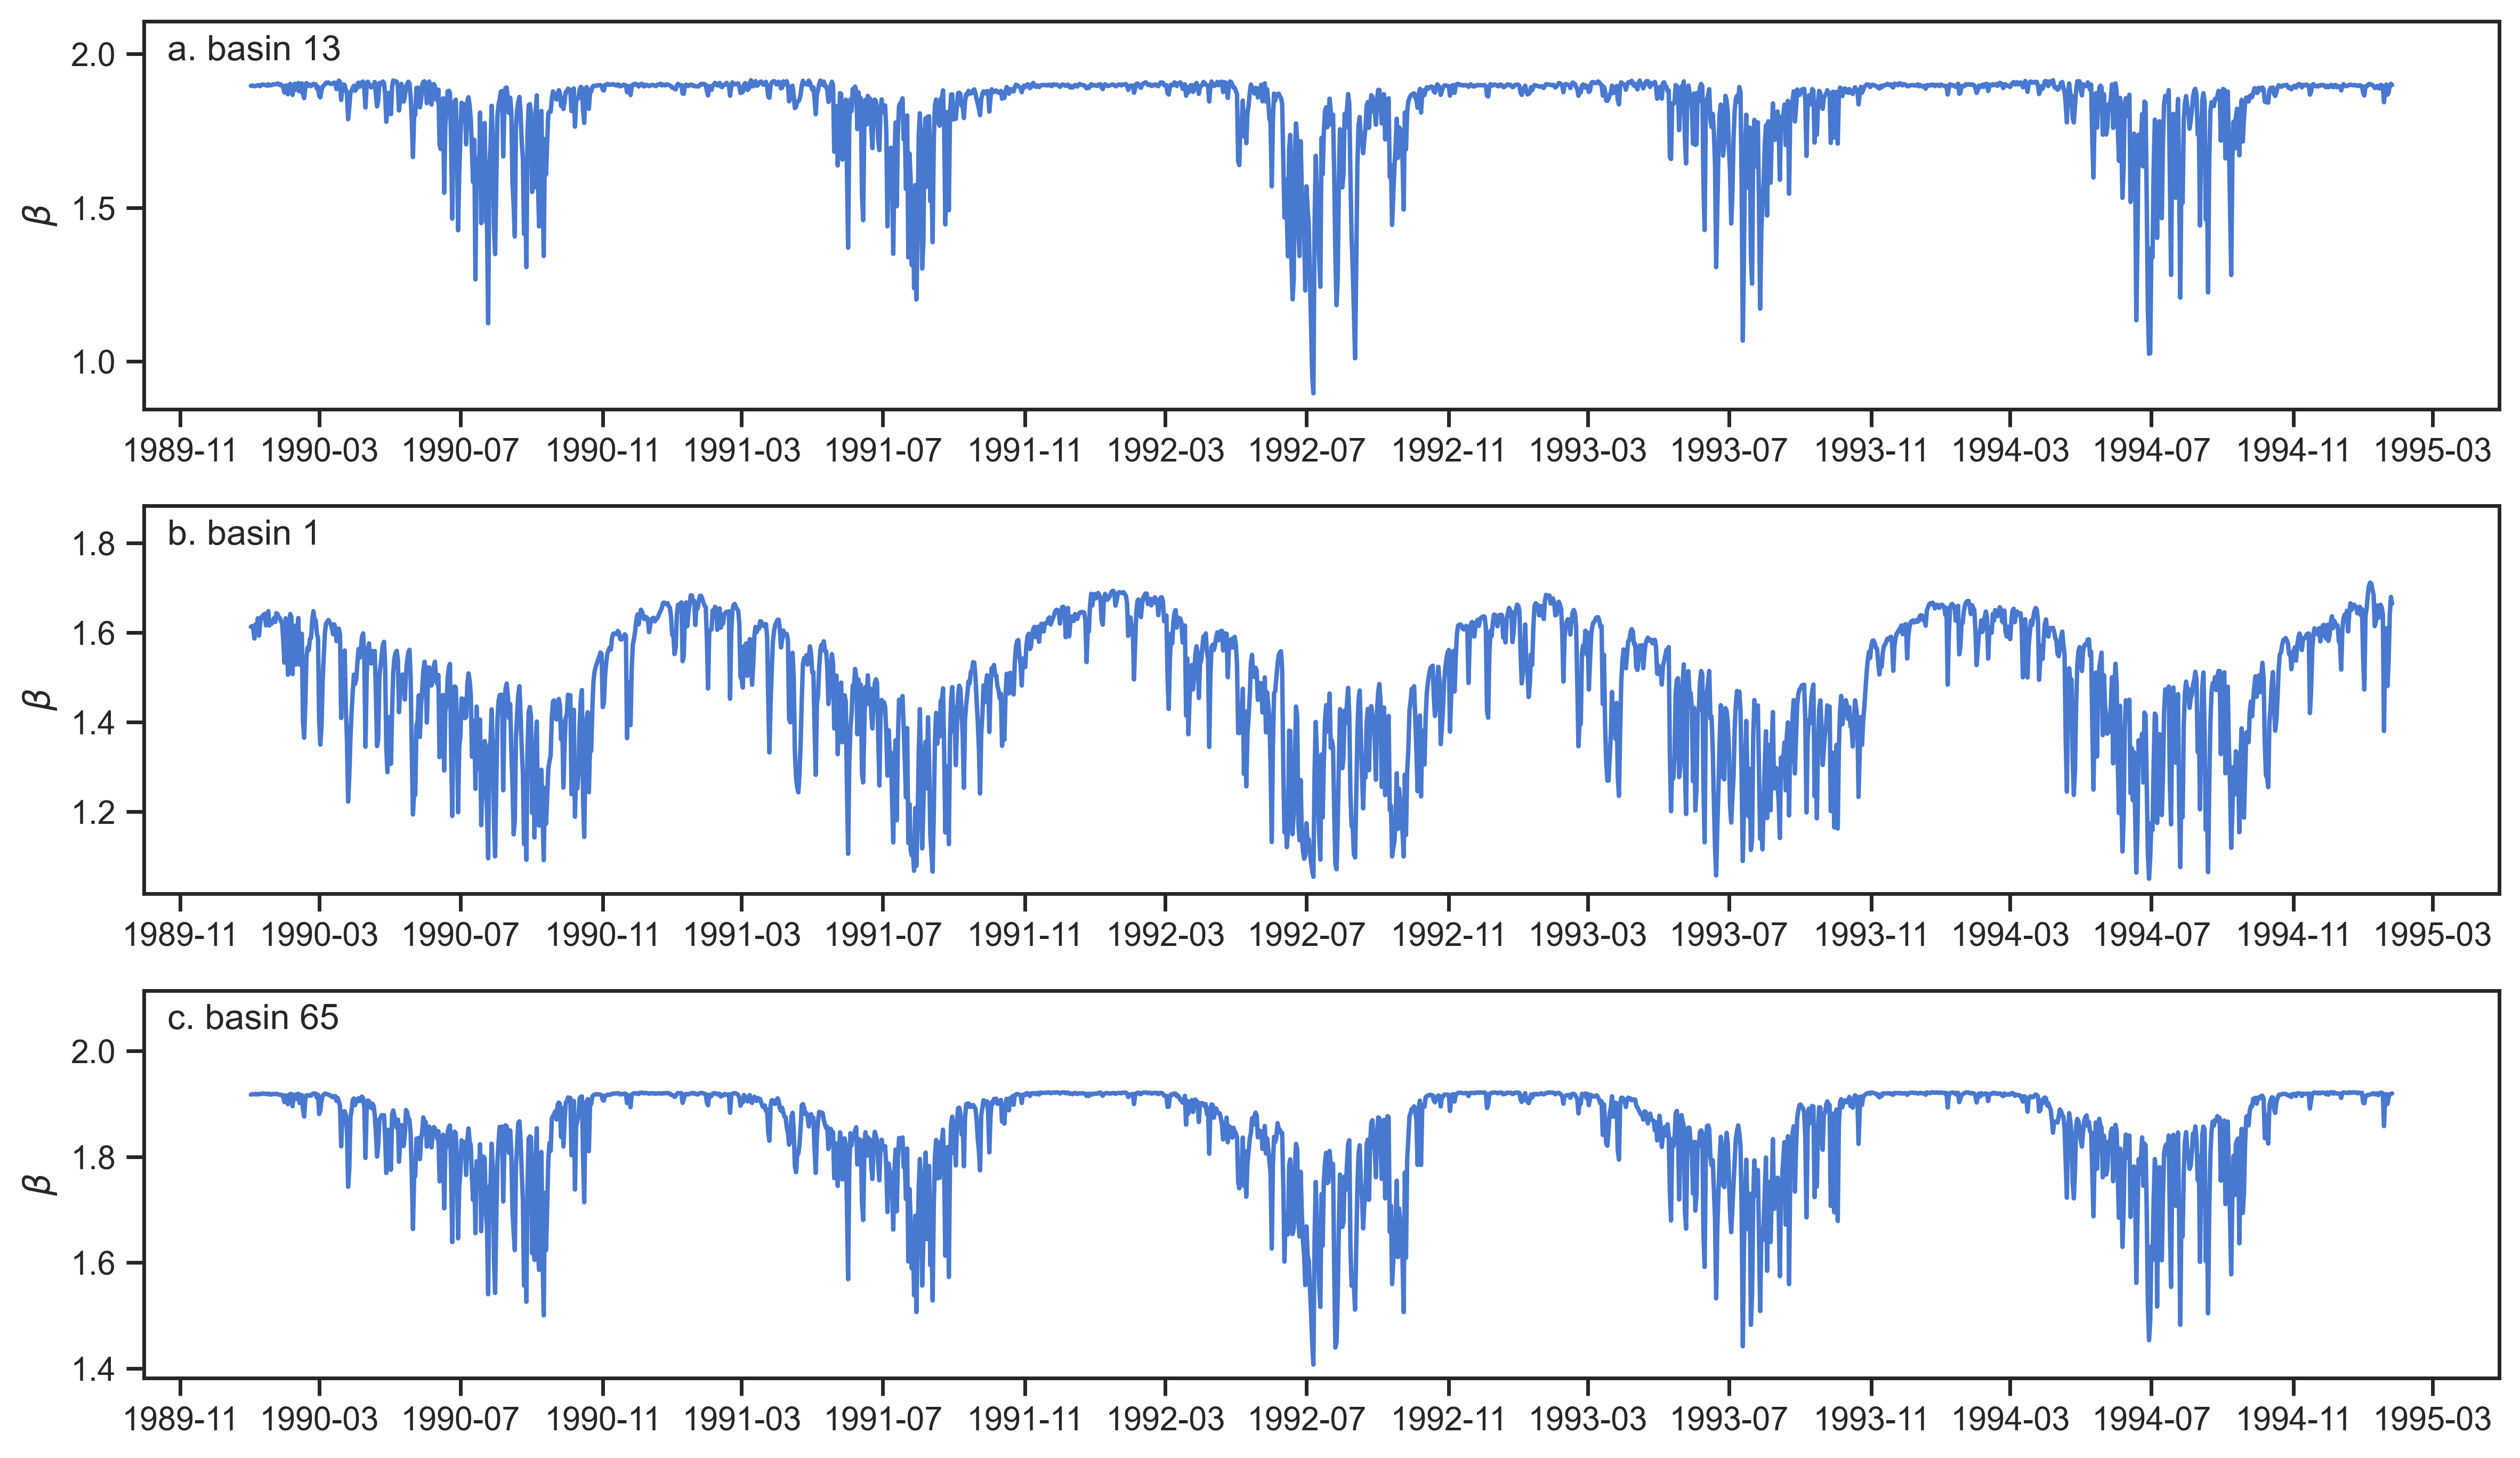

In [54]:
fig = plt.figure(figsize=(12, 7), dpi=400)
basin_ids = [13, 1, 65]
colors = sns.color_palette('muted', n_colors=2)
for i, basin_id in enumerate(basin_ids):
    ax = fig.add_subplot(3, 1, i+1)
    # ax.plot(obs_LAI.loc[:, f'basin_{basin_id}'], label='GLASS AVHRR LAI', linewidth=1, color=colors[0])
    t = beta.index[0] + pd.to_timedelta(1850, unit='days')
    ax.plot(beta.loc[:t, i], color=colors[0])
    ax.set_ylim(top=beta.loc[:t, i].max() * 1.1)
    ax.set_ylabel(r'$\beta$')
    ax.annotate(f'{chr(97+i)}. basin {basin_id}', xy=(0.01, 0.9), xycoords='axes fraction')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

plt.tight_layout()

In [58]:
folder = '../checkpoints/seed_759826_out_TNH_staTyp_ConvMLP_staSz_70_3_128_7_730_10-5-1_7-5-3_1-1-1_3-2-1_dynTyp_LSTM_dynSz_73_128_3_routSz_6_32_2_t_1223-2146'
beta = np.load(os.path.join(folder, 'beta.npy'))
t_range = pd.date_range('1990-1-1', '2019-12-31')
beta = pd.DataFrame(beta.T, index=t_range)

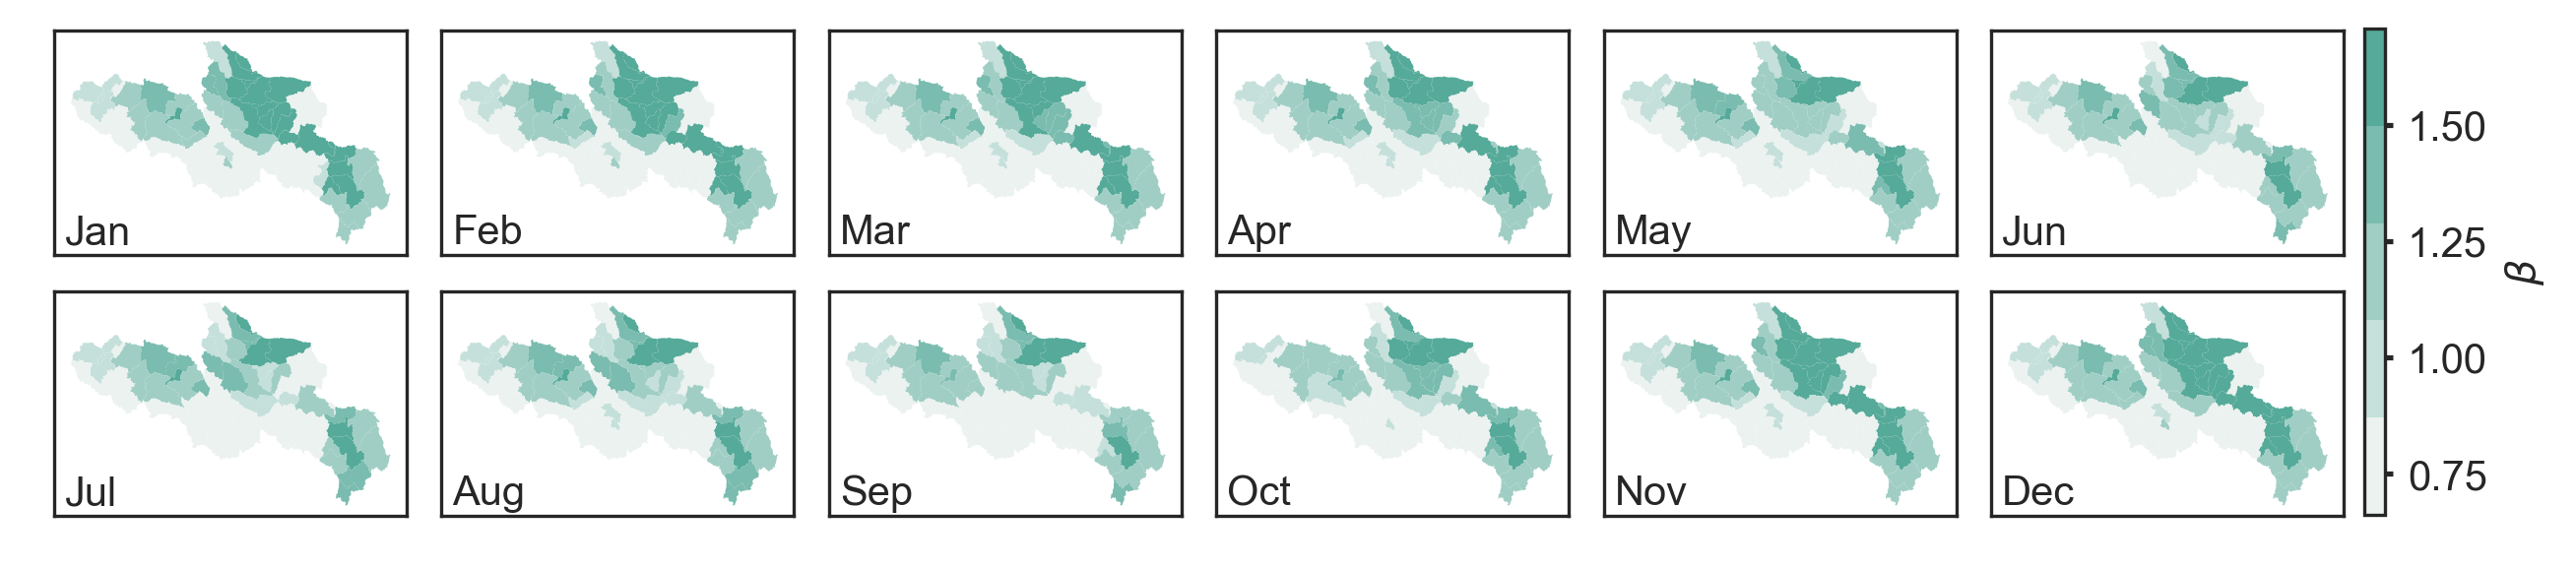

In [62]:
colors = sns.color_palette('light:#5A9', n_colors=5)
cmap = ListedColormap(colors)
plotBetaMap(beta, cmap=cmap, basinFile='../data/sub-basins/watershed.shp', figSize=(10, 2.5), savePath=None)

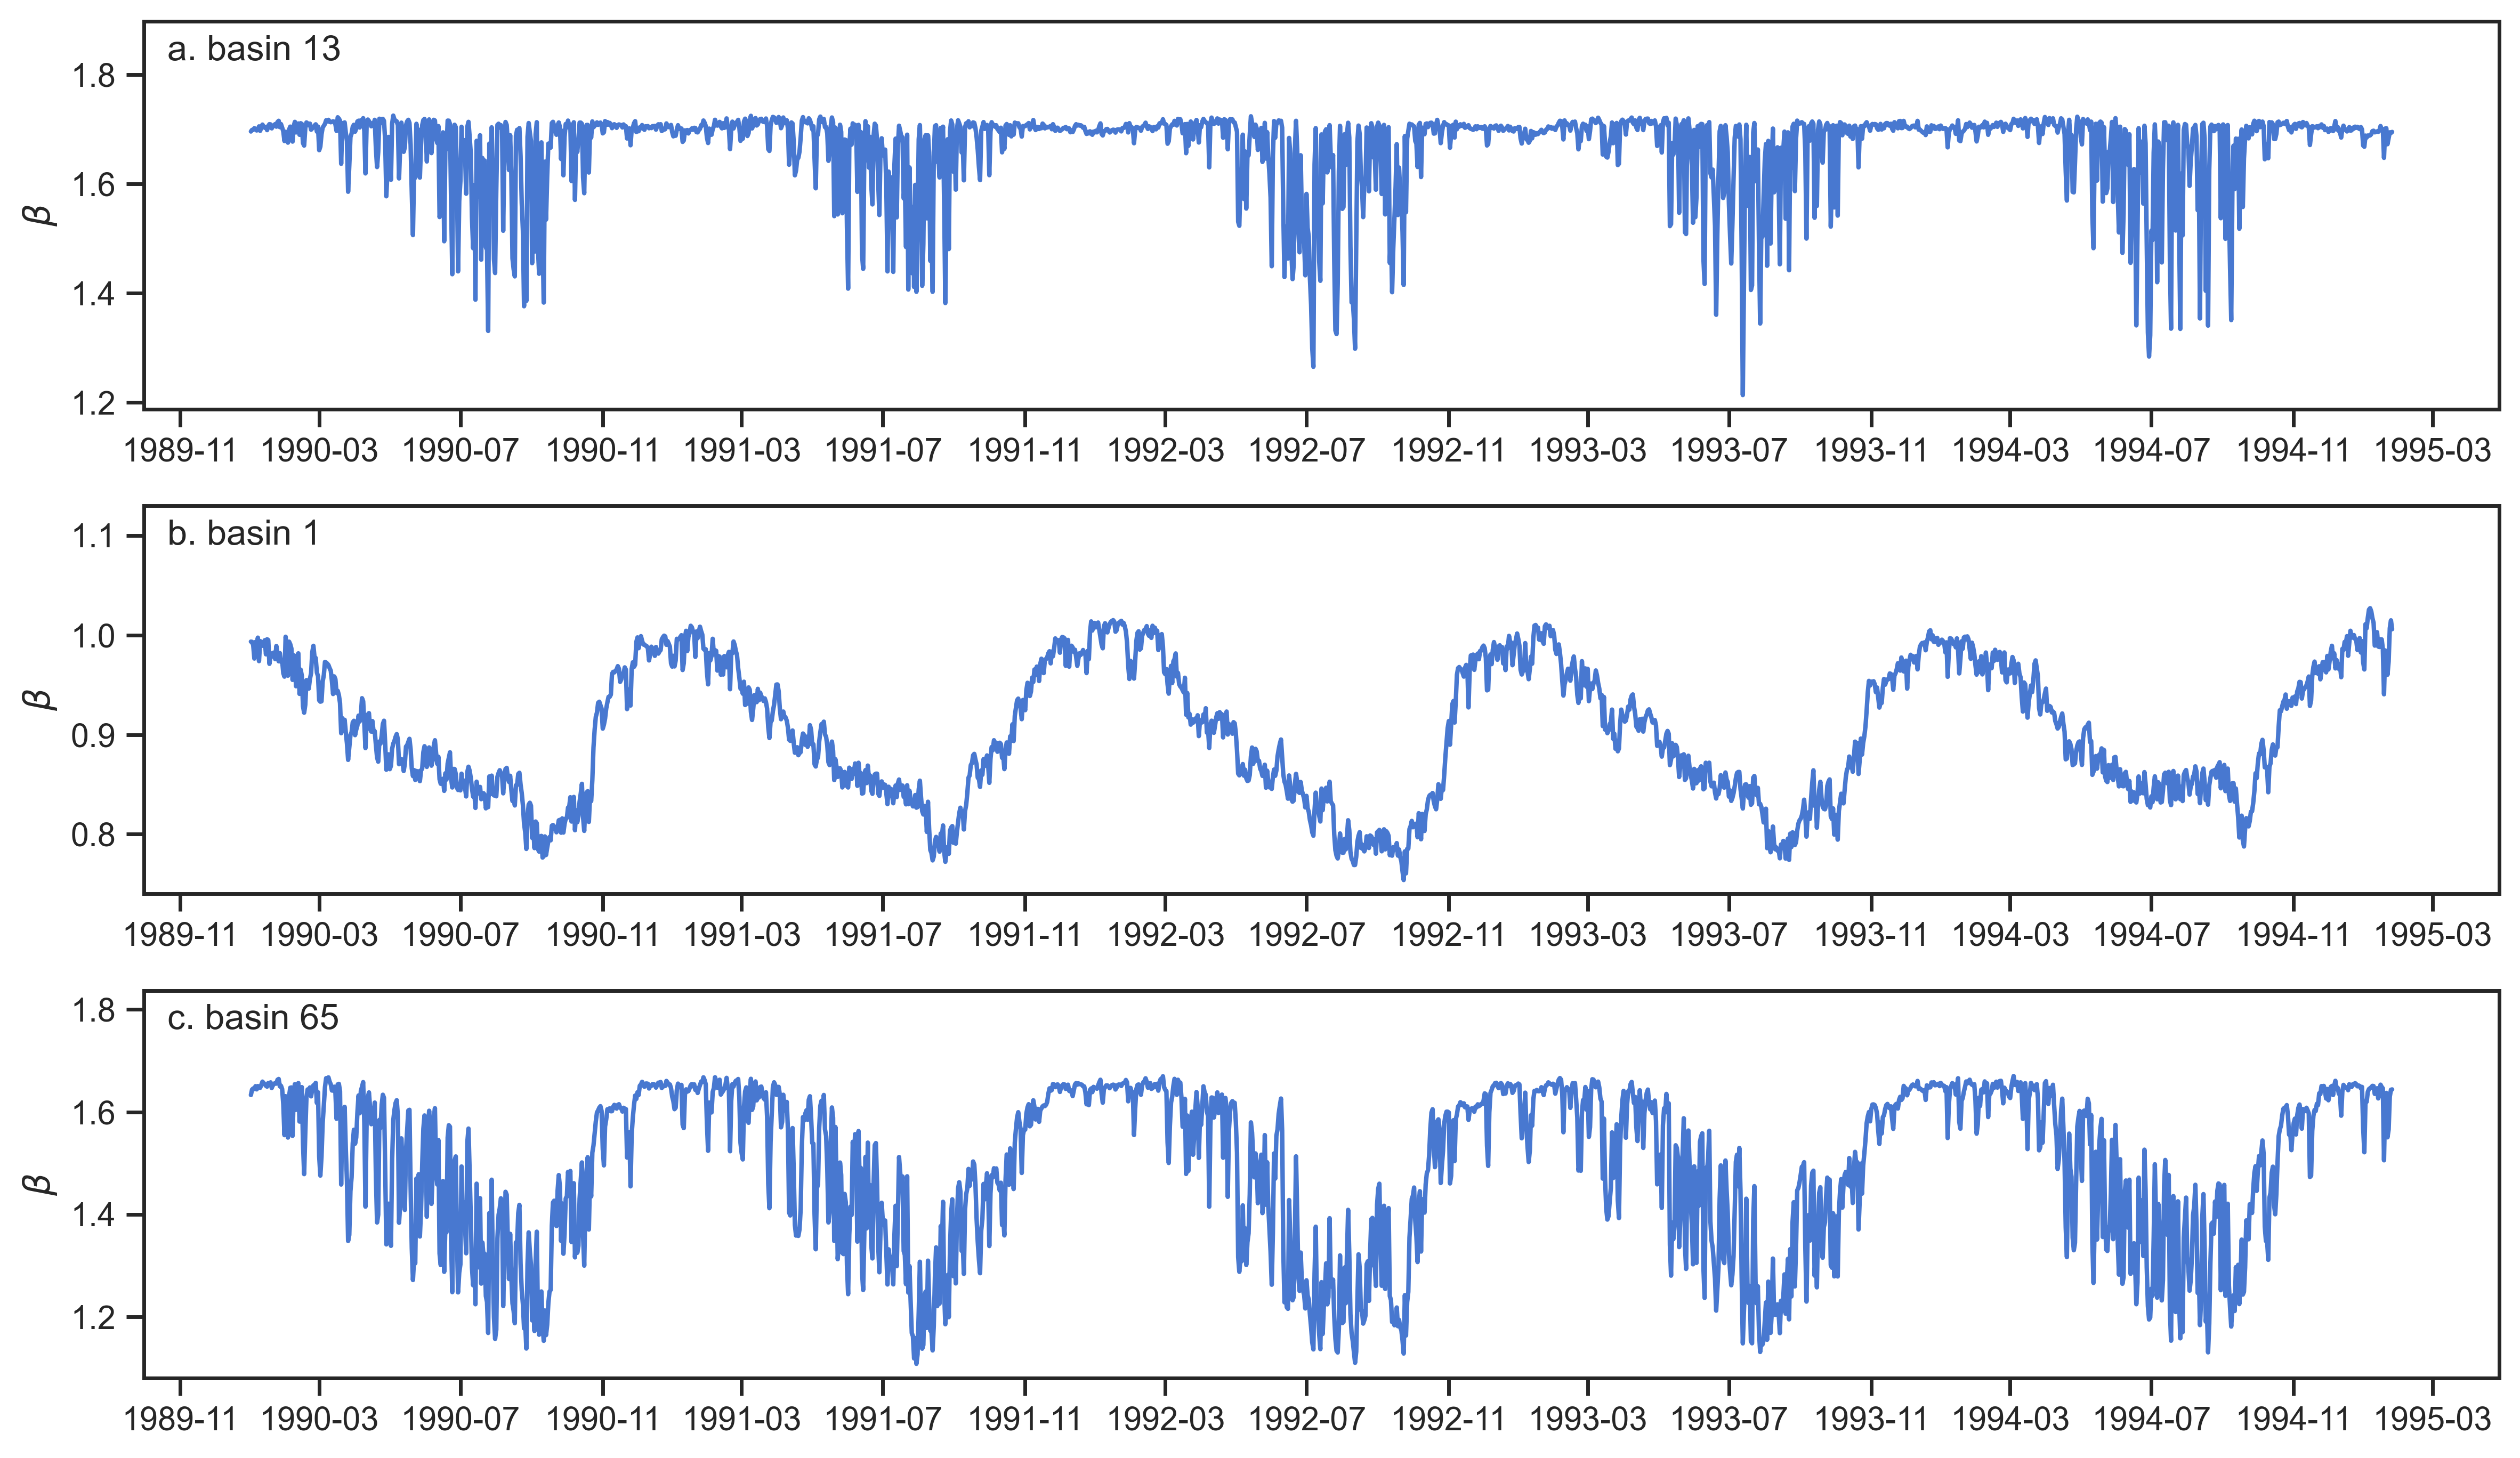

In [60]:
fig = plt.figure(figsize=(12, 7), dpi=400)
basin_ids = [13, 1, 65]
colors = sns.color_palette('muted', n_colors=2)
for i, basin_id in enumerate(basin_ids):
    ax = fig.add_subplot(3, 1, i+1)
    # ax.plot(obs_LAI.loc[:, f'basin_{basin_id}'], label='GLASS AVHRR LAI', linewidth=1, color=colors[0])
    t = beta.index[0] + pd.to_timedelta(1850, unit='days')
    ax.plot(beta.loc[:t, i], color=colors[0])
    ax.set_ylim(top=beta.loc[:t, i].max() * 1.1)
    ax.set_ylabel(r'$\beta$')
    ax.annotate(f'{chr(97+i)}. basin {basin_id}', xy=(0.01, 0.9), xycoords='axes fraction')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

plt.tight_layout()